# Case study on Credit Risk

# Context: 
Credit risk is nothing but the default in payment of any loan by the borrower. In Banking sector this is an important factor to 
be considered before approving the loan of an applicant.Dream Housing Finance company deals in all home loans. They have presence
across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer 
eligibility for loan.

# Objective:
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online 
application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History 
and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan 
amount so that they can specifically target these customers. Here they have provided a partial data set.

Dataset:

* Variable	      Description
* Loan_ID	          Unique Loan ID
* Gender	          Male/ Female
* Married	          Applicant married (Y/N)
* Dependents	      Number of dependents
* Education	      Applicant Education (Graduate/ Under Graduate)
* Self_Employed	  Self employed (Y/N)
* ApplicantIncome	  Applicant income
* CoapplicantIncome Coapplicant income
* LoanAmount	      Loan amount in thousands
* Loan_Amount_Term  Term of loan in months
* Credit_History	  credit history meets guidelines
* Property_Area	  Urban/ Semi Urban/ Rural
* Loan_Status	      Loan approved (Y/N)

In [1]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

In [16]:
import os
import numpy as np
import pandas as pd

# importing ploting libraries
import matplotlib.pyplot as plt   
import seaborn as sns

#importing seaborn for statistical plots
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# calculate accuracy measures and confusion matrix
from sklearn import metrics

In [17]:
df = pd.read_csv('CreditRisk.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,1


## Check for Duplicate records

In [18]:
# Check for duplicate data
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]

Number of duplicate rows = 0


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [20]:
df = df.drop_duplicates() 
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]

Number of duplicate rows = 0


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


## Loan Id column revmoval

In [21]:
cr_df = df.drop('Loan_ID', axis =1 ) # dropping this column as it will be 1-1 mapping anyways
cr_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,0,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,1


In [22]:
cr_df['Loan_Amount_Term'].value_counts(normalize=True)

360.0    0.853333
180.0    0.073333
480.0    0.025000
300.0    0.021667
84.0     0.006667
240.0    0.006667
120.0    0.005000
36.0     0.003333
60.0     0.003333
12.0     0.001667
Name: Loan_Amount_Term, dtype: float64

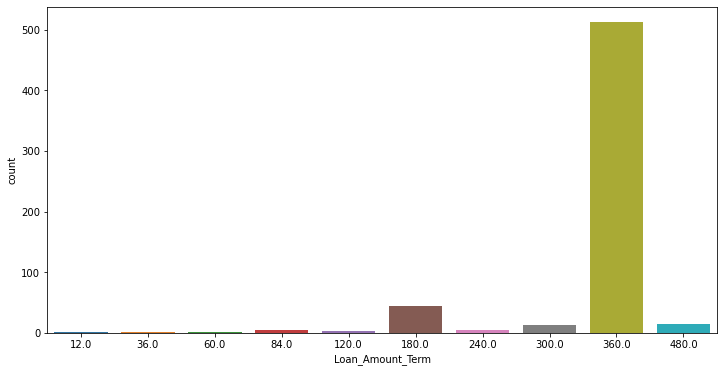

In [23]:
plt.figure(figsize = (12,6))
sns.countplot(cr_df['Loan_Amount_Term'])

In [24]:
# The Loan_Amount_Term is highly skewed - so we will delete this column
cr_df.drop(['Loan_Amount_Term'], axis=1, inplace=True)

# Data Information

In [26]:
cr_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    int64  
 8   Credit_History     564 non-null    float64
 9   Property_Area      614 non-null    object 
 10  Loan_Status        614 non-null    int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 77.6+ KB


In [25]:
cr_df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [27]:
# every column's missing value is replaced with 0 respectively
cr_df = cr_df.dropna(axis=0)
# cr_df = cr_df.replace({'NaN':df.median()})
cr_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71,1.0,Rural,1
610,Male,Yes,3+,Graduate,No,4106,0.0,40,1.0,Rural,1
611,Male,Yes,1,Graduate,No,8072,240.0,253,1.0,Urban,1
612,Male,Yes,2,Graduate,No,7583,0.0,187,1.0,Urban,1


In [28]:
cr_df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [29]:
#Lets analysze the distribution of the various attribute
cr_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,511.0,5308.146771,5561.209487,150.0,2885.5,3858.0,5820.0,81000.0
CoapplicantIncome,511.0,1561.997886,2559.383166,0.0,0.0,1086.0,2253.5,33837.0
LoanAmount,511.0,138.776908,82.889278,0.0,97.5,125.0,165.5,600.0
Credit_History,511.0,0.843444,0.363738,0.0,1.0,1.0,1.0,1.0
Loan_Status,511.0,0.679061,0.467295,0.0,0.0,1.0,1.0,1.0


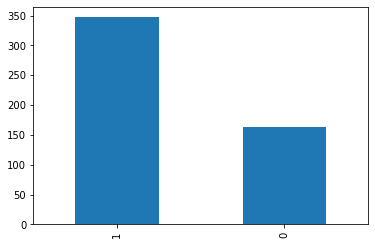

In [30]:
cr_df['Loan_Status'].value_counts().plot(kind='bar')

In [34]:
cr_df['Loan_Status'].value_counts(normalize=True)

1    0.679061
0    0.320939
Name: Loan_Status, dtype: float64

# Exploratory Data Analysis

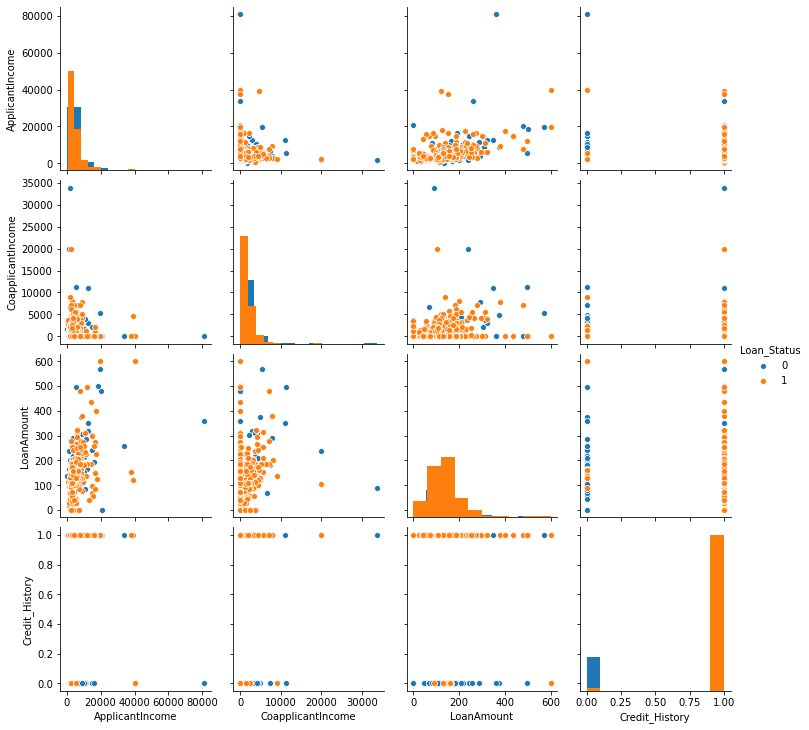

In [90]:
# Pairplot using sns
sns.pairplot(cr_df ,diag_kind='hist' ,hue='Loan_Status');

## Numerical Columns 

In [66]:
cr_df.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66,1.0,Urban,1


In [67]:
num_cols = cr_df.select_dtypes(include = np.number).columns.tolist()
num_data = cr_df[num_cols]
num_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Loan_Status
0,5849,0.0,0,1.0,1
1,4583,1508.0,128,1.0,0
2,3000,0.0,66,1.0,1
3,2583,2358.0,120,1.0,1
4,6000,0.0,141,1.0,1


In [68]:
num_data = num_data.drop(['Credit_History','Loan_Status'],axis=1)

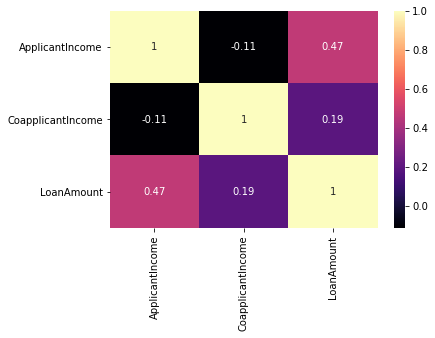

In [69]:
corr = num_data.corr()
sns.heatmap(corr,cmap='magma',annot=True)

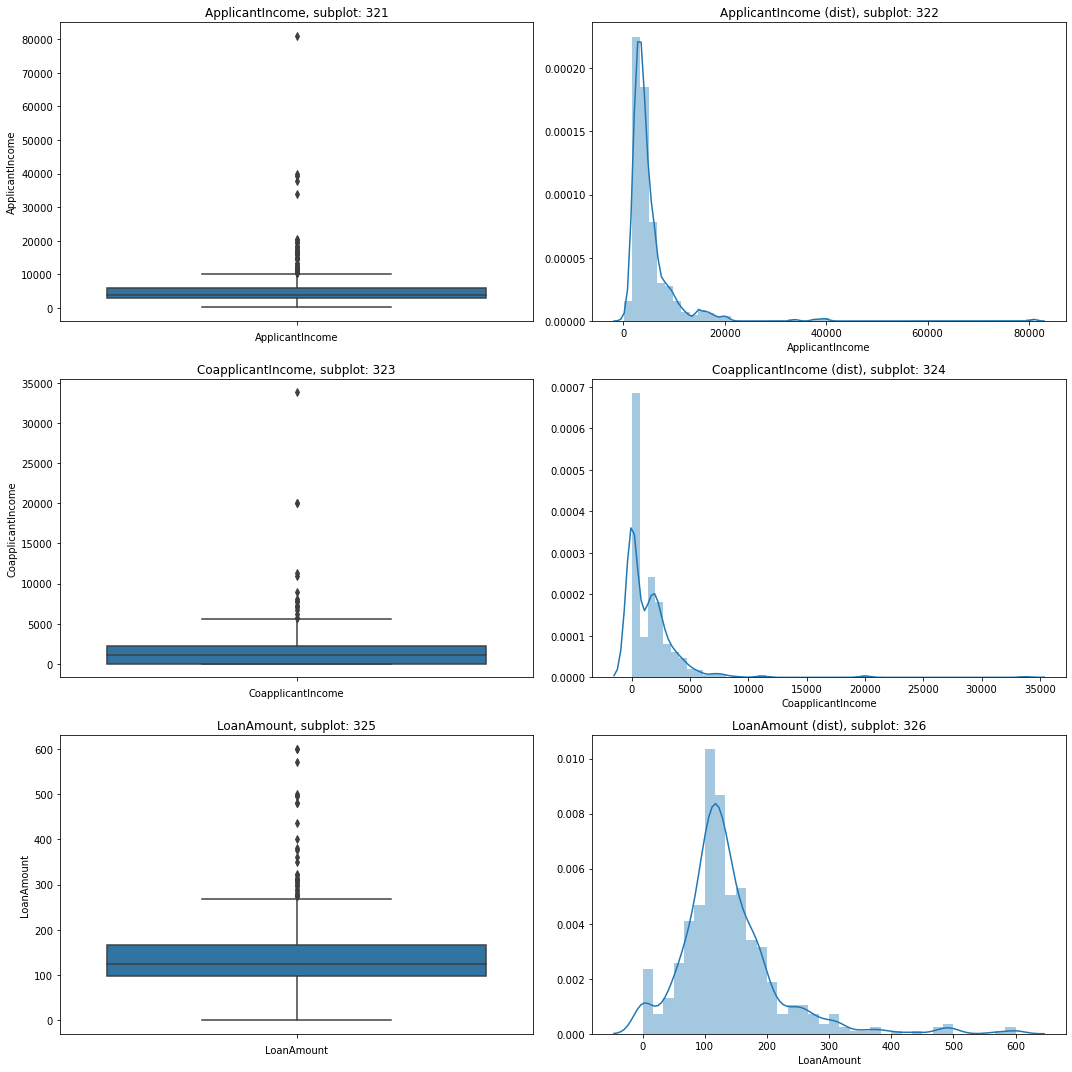

In [70]:
a = 3  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(15,10))
fig.set_size_inches(15,15)

for i in num_data.columns:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.boxplot(num_data[i],orient="v",)
    c = c + 1
    
    plt.subplot(a, b, c)
    plt.title('{} (dist), subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.distplot(num_data[i])
    c = c + 1
    plt.tight_layout()
plt.show();

Outliers in the data

## Outliers Treatment

In [71]:
# General Function to remove outlier
def treat_outlier(col):
    q1,q3 = col.quantile([0.25,0.75])
    IQR = q3-q1
    lri = q1-(1.5*IQR)
    uri = q3 + (1.5*IQR)
    return lri, uri

In [72]:
lri,uri = treat_outlier(num_data['ApplicantIncome'])
num_data['ApplicantIncome']=np.where(num_data['ApplicantIncome']>uri,uri,num_data['ApplicantIncome'])
num_data['ApplicantIncome']=np.where(num_data['ApplicantIncome']<lri,lri,num_data['ApplicantIncome'])

lri,uri = treat_outlier(num_data['CoapplicantIncome'])
num_data['CoapplicantIncome']=np.where(num_data['CoapplicantIncome']>uri,uri,num_data['CoapplicantIncome'])
num_data['CoapplicantIncome']=np.where(num_data['CoapplicantIncome']<lri,lri,num_data['CoapplicantIncome'])

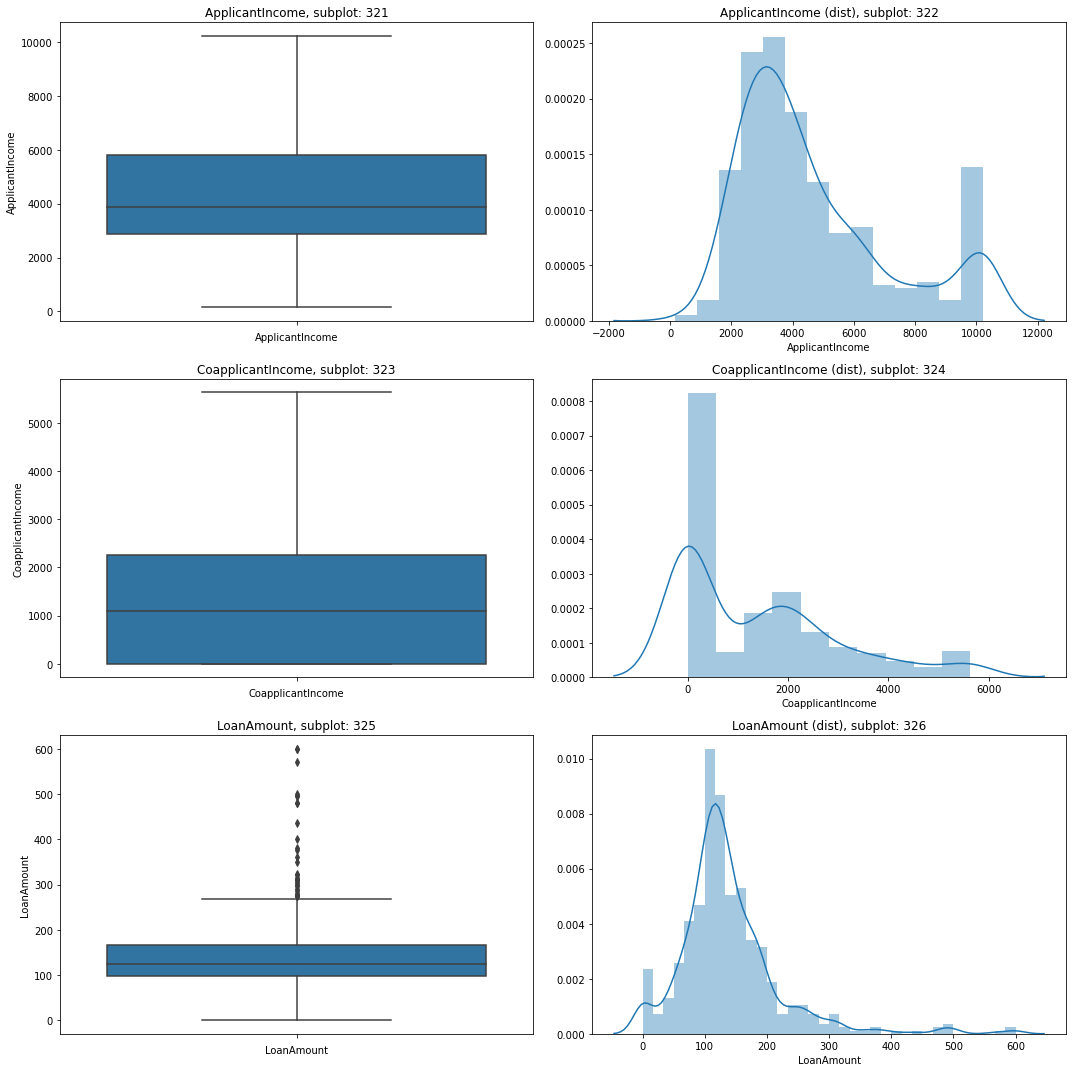

In [73]:
a = 3  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(15,10))
fig.set_size_inches(15,15)

for i in num_data.columns:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.boxplot(num_data[i],orient="v",)
    c = c + 1
    
    plt.subplot(a, b, c)
    plt.title('{} (dist), subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.distplot(num_data[i])
    c = c + 1
    plt.tight_layout()
plt.show();

# Categorical Features

In [75]:
cat_cols = cr_df.select_dtypes(include = np.object).columns.tolist()
cat_data = cr_df[cat_cols]
cat_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,Male,No,0,Graduate,No,Urban
1,Male,Yes,1,Graduate,No,Rural
2,Male,Yes,0,Graduate,Yes,Urban
3,Male,Yes,0,Not Graduate,No,Urban
4,Male,No,0,Graduate,No,Urban


In [77]:
cr_df['Credit_History'] = cr_df['Credit_History'].astype('category')
cr_df['Loan_Status'] = cr_df['Loan_Status'].astype('category')

In [78]:
cat_data = pd.concat([cat_data,cr_df[['Credit_History']]],axis=1)
cat_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Credit_History
0,Male,No,0,Graduate,No,Urban,1.0
1,Male,Yes,1,Graduate,No,Rural,1.0
2,Male,Yes,0,Graduate,Yes,Urban,1.0
3,Male,Yes,0,Not Graduate,No,Urban,1.0
4,Male,No,0,Graduate,No,Urban,1.0


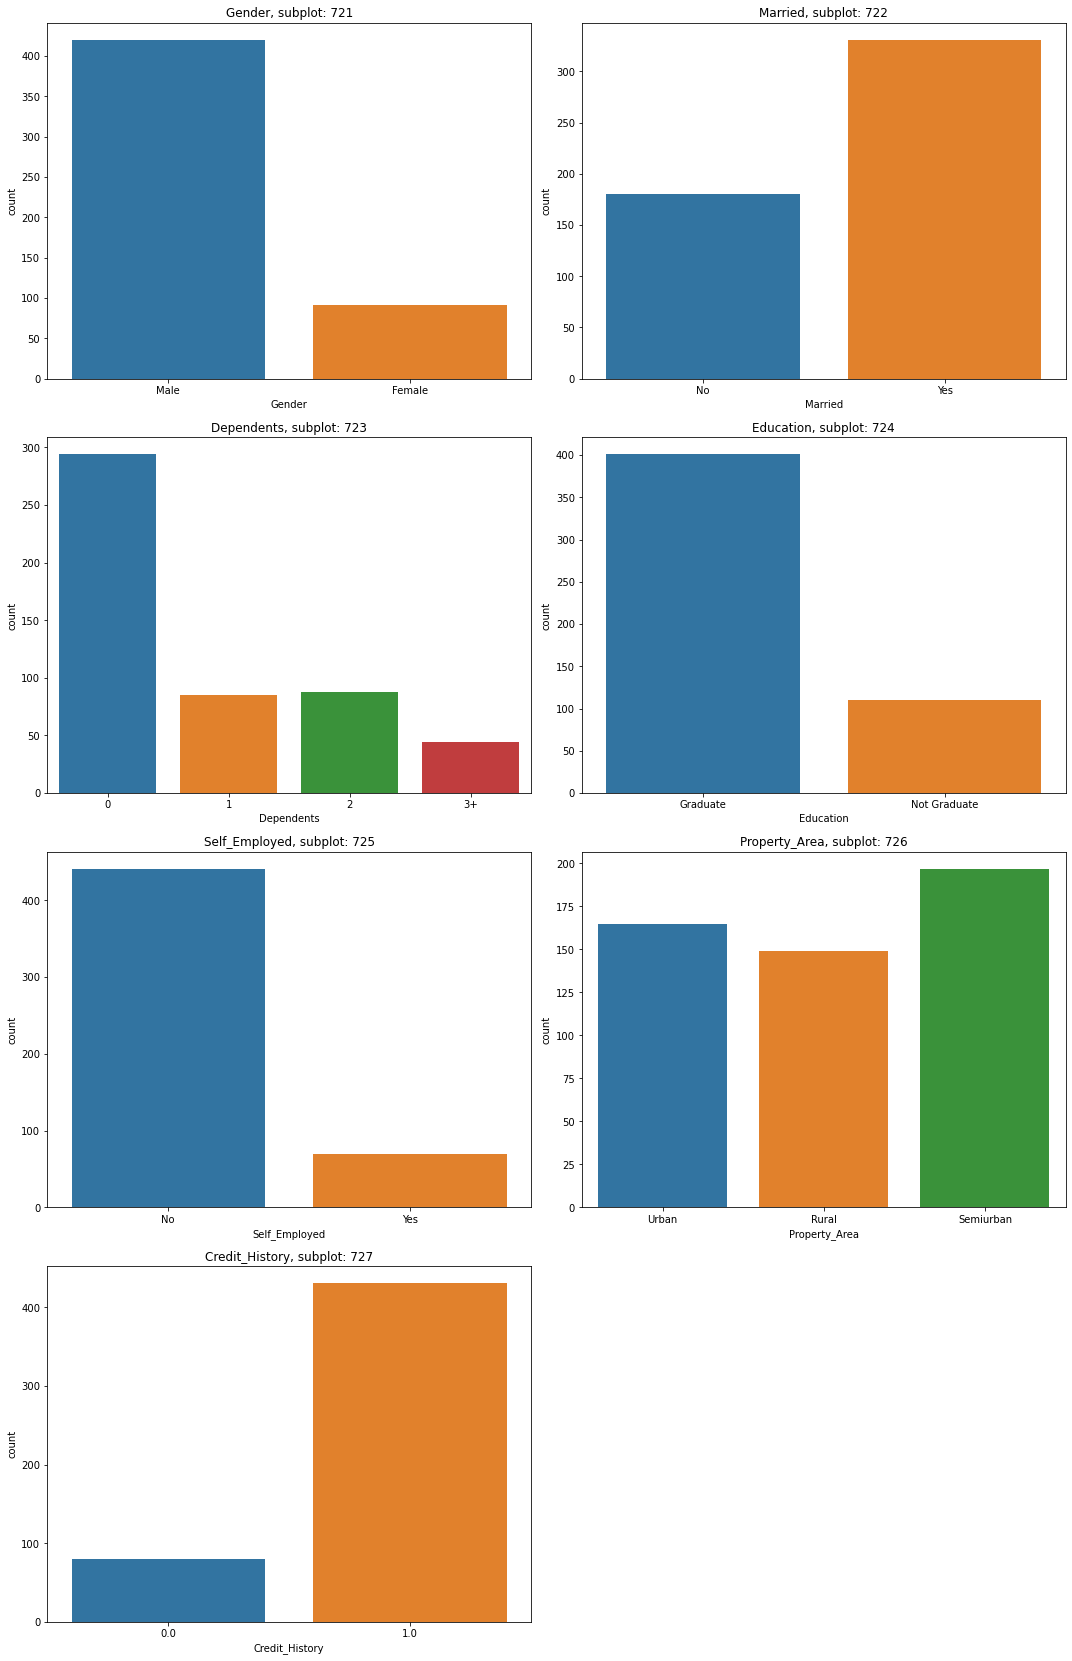

In [88]:
a = 7  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(15,10))
fig.set_size_inches(15,40)

for i in cat_data.columns:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.countplot(cat_data[i])
    c = c + 1
    plt.tight_layout()

plt.show();

# Bi-Variate Analysis

In [96]:
cr_df.groupby('Loan_Status').mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount
Loan_Status,,,
0,5648.908537,1708.25000,142.445122
1,5147.095101,1492.87585,137.043228


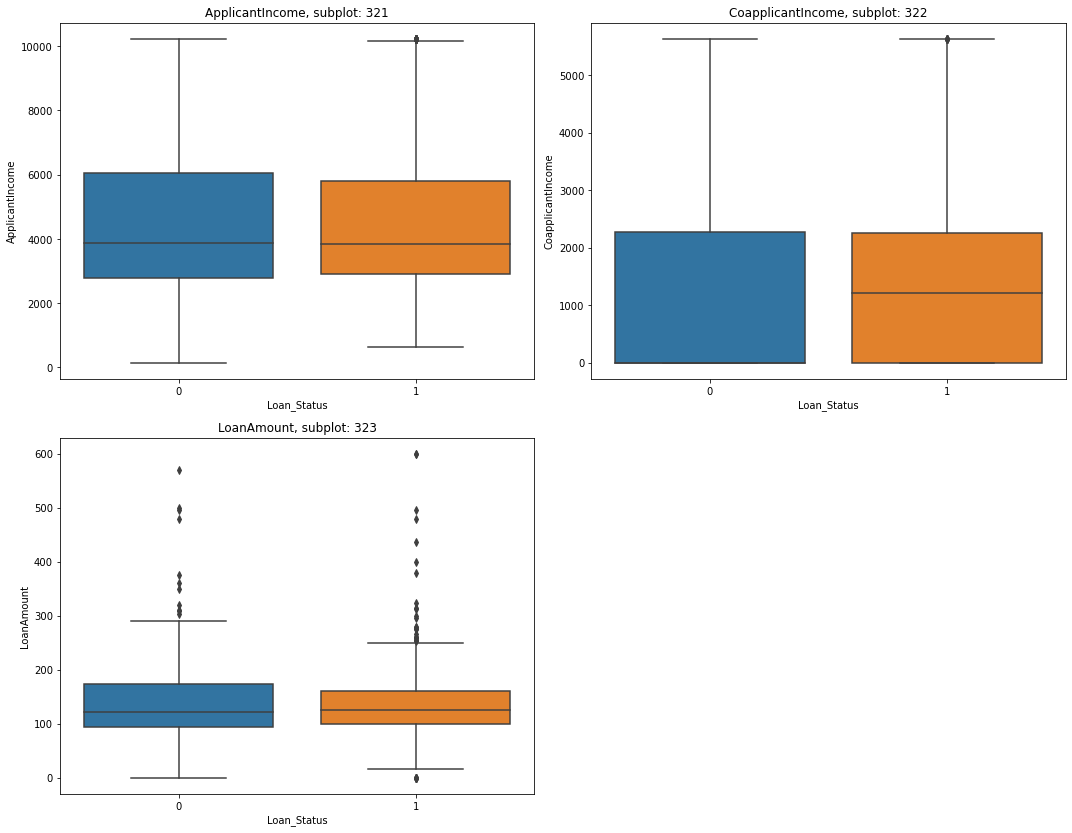

In [108]:
a = 3  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(20,6))
fig.set_size_inches(15, 17)

for i in num_data.columns:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.boxplot(cr_df['Loan_Status'], num_data[i],orient="v",)
    c = c + 1
    
plt.tight_layout()    
plt.show();

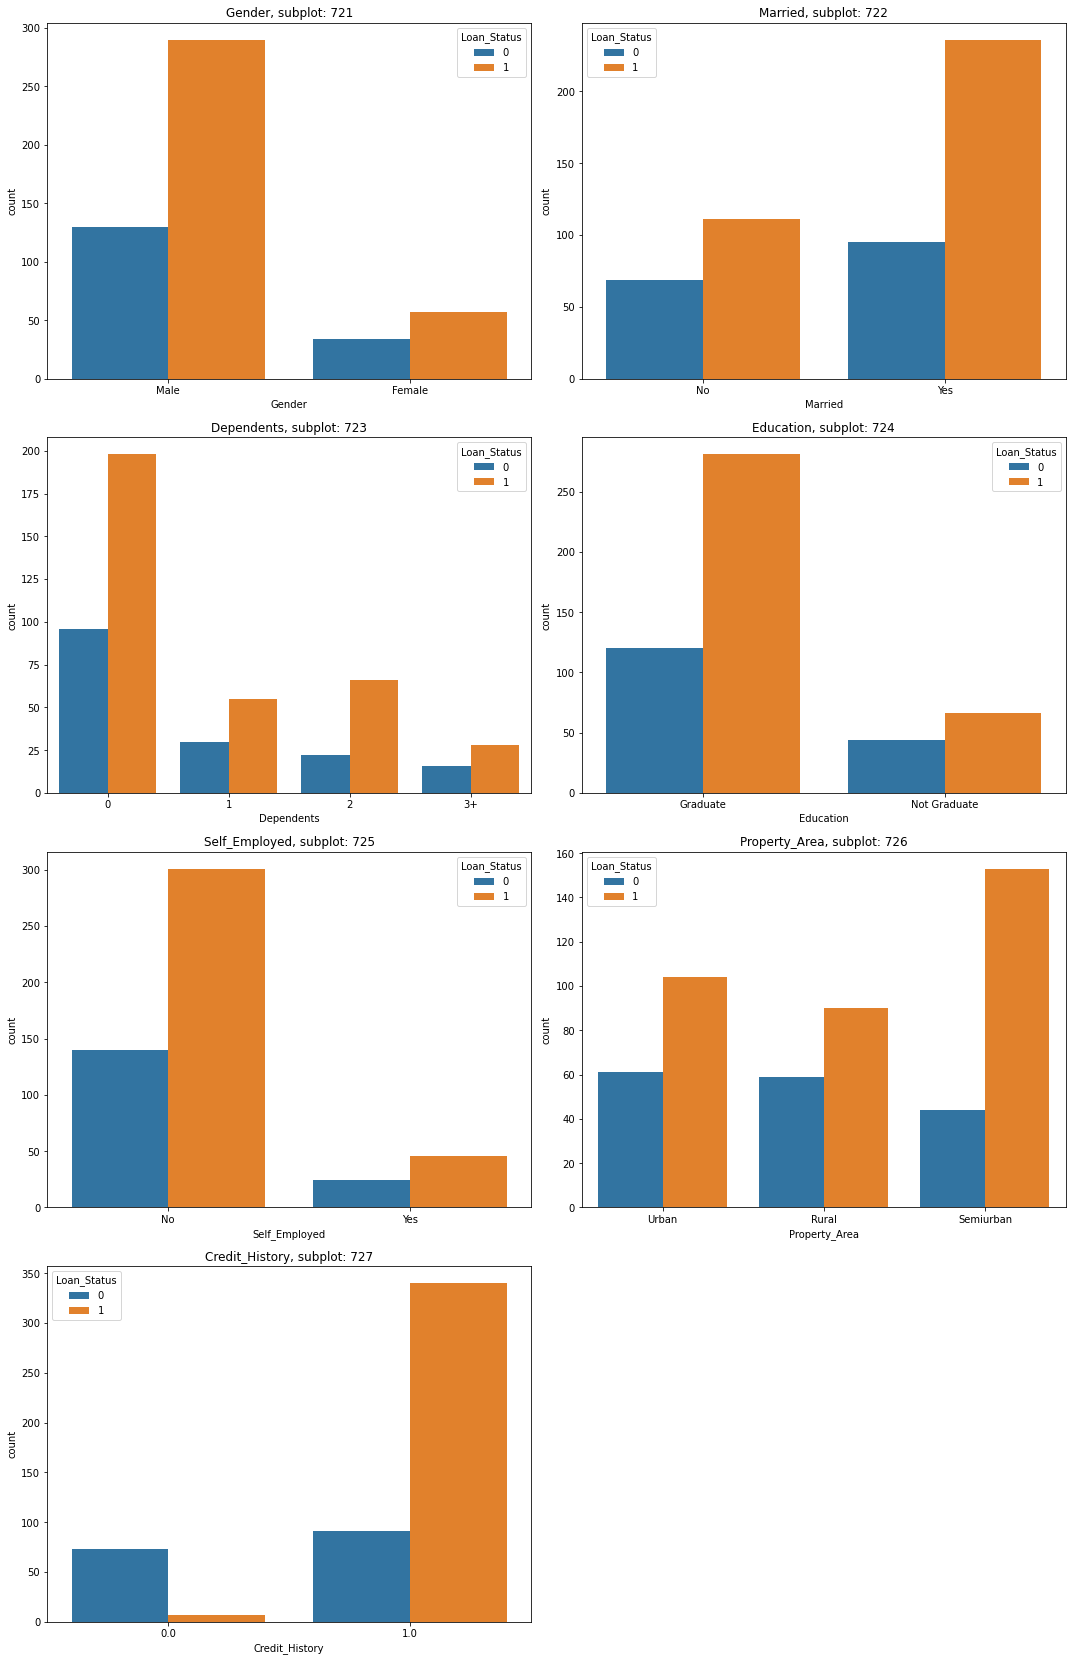

In [113]:
a = 7  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(15,10))
fig.set_size_inches(15,40)

for i in cat_data.columns:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.countplot(cat_data[i],hue=cr_df['Loan_Status'])
    c = c + 1
    plt.tight_layout()

plt.show();

**There is a slight imbalance in the data**

In [115]:
cat_data = pd.concat([cat_data,cr_df['Loan_Status']],axis=1)
cat_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Credit_History,Loan_Status
0,Male,No,0,Graduate,No,Urban,1.0,1
1,Male,Yes,1,Graduate,No,Rural,1.0,0
2,Male,Yes,0,Graduate,Yes,Urban,1.0,1
3,Male,Yes,0,Not Graduate,No,Urban,1.0,1
4,Male,No,0,Graduate,No,Urban,1.0,1


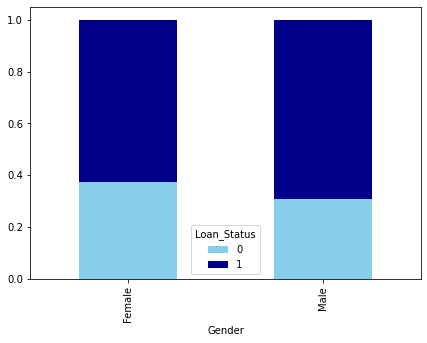

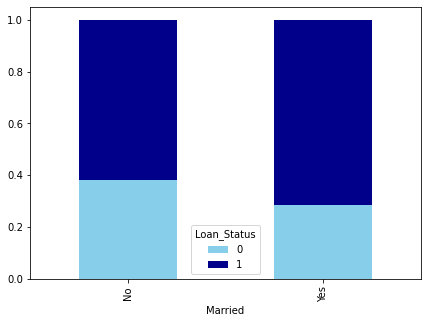

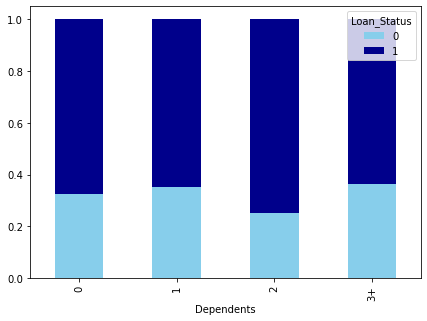

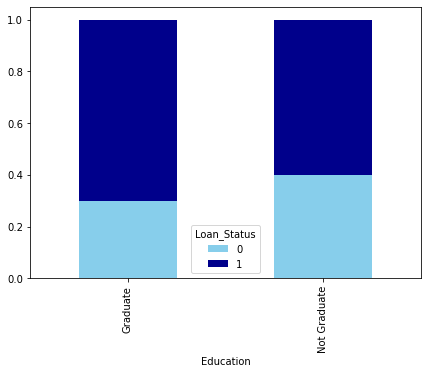

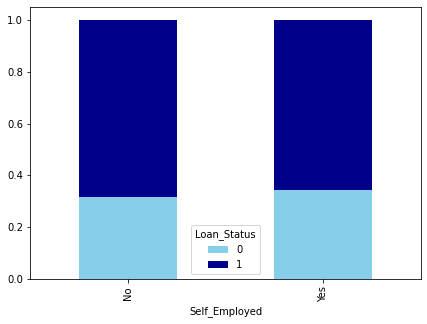

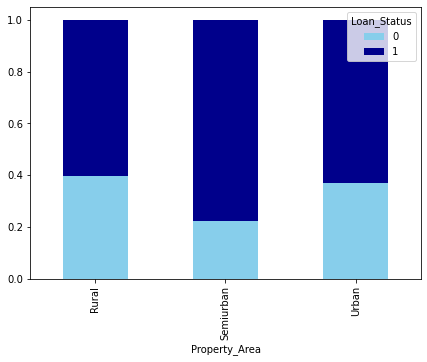

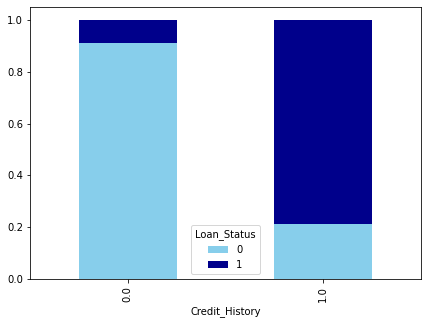

In [123]:
for i in cat_data.iloc[:,:-1].columns:
    data = pd.crosstab(cat_data[i],cat_data['Loan_Status'])
    data.div(data.sum(1).astype('float'),axis = 0).plot(kind = 'bar', stacked = True, 
                                                        figsize = (7, 5), 
                                                        color = ['skyblue', 'darkblue'])

## One-hot Encoding

In [125]:
#Convert categorical vriables to dummy variables
cat_data = pd.get_dummies(cat_data.iloc[:,:-1], drop_first=True)
cat_data.head()

,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Credit_History_1.0
0,1,0,0,0,0,0,0,0,1,1
1,1,1,1,0,0,0,0,0,0,1
2,1,1,0,0,0,0,1,0,1,1
3,1,1,0,0,0,1,0,0,1,1
4,1,0,0,0,0,0,0,0,1,1


# Final Data

In [126]:
final_data = pd.concat([num_data,cat_data,cr_df['Loan_Status']],axis=1)
final_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Credit_History_1.0,Loan_Status
0,5849.0,0.0,0,1,0,0,0,0,0,0,0,1,1,1
1,4583.0,1508.0,128,1,1,1,0,0,0,0,0,0,1,0
2,3000.0,0.0,66,1,1,0,0,0,0,1,0,1,1,1
3,2583.0,2358.0,120,1,1,0,0,0,1,0,0,1,1,1
4,6000.0,0.0,141,1,0,0,0,0,0,0,0,1,1,1


# Train Test Split

In [213]:
## Define X and Y variables
X = final_data.drop('Loan_Status', axis=1)
Y = final_data['Loan_Status']

In [214]:
## Split into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,
                                                    stratify = Y,
                                                    random_state=42)

In [217]:
print(y_train.value_counts(normalize = True))
print(y_test.value_counts(normalize = True))

1    0.677871
0    0.322129
Name: Loan_Status, dtype: float64
1    0.681818
0    0.318182
Name: Loan_Status, dtype: float64


## Normalize the numerical data

In [218]:
num_cols = num_data.columns
num_cols

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'], dtype='object')

In [219]:
from sklearn.preprocessing import MinMaxScaler
normalize = MinMaxScaler()

In [220]:
# fit transform on the train data
X_train[num_cols] = normalize.fit_transform(X_train[num_cols])

# Transform on the test data
X_test[num_cols] = normalize.transform(X_test[num_cols])

<ipython-input-220-d501c4e37564>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[num_cols] = normalize.fit_transform(X_train[num_cols])
C:\Users\anchhabra\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
<ipython-input-220-d501c4e37564>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

In [259]:
X_train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Credit_History_1.0
489,0.186911,0.0,0.125000,1,0,0,0,0,0,0,0,1,1
288,0.363276,0.0,0.191667,0,0,0,0,0,0,0,1,0,1
402,0.193698,1.0,0.171667,1,0,0,0,0,0,0,1,0,1
454,0.672462,0.0,0.140000,1,0,0,0,0,0,1,1,0,1
135,0.350328,1.0,0.483333,1,1,0,0,1,0,0,1,0,1


# Logistic Regression Model

In [221]:
from sklearn.linear_model import LogisticRegression

In [222]:
#Build the logistic regression model
logreg = LogisticRegression(max_iter = 1000,
                            random_state = 1,
                            penalty='l2')
logreg

LogisticRegression(max_iter=1000, random_state=1)

In [223]:
logreg.fit(X_train, y_train.values.ravel())

LogisticRegression(max_iter=1000, random_state=1)

In [224]:
logreg.intercept_

array([-2.08910072])

In [225]:
logreg.coef_

array([[-0.15076566,  0.13353584, -0.50398855,  0.08414305,  0.43280105,
        -0.2302145 ,  0.20868907,  0.42523199, -0.21364692, -0.26675596,
         0.64082789,  0.13243424,  2.89651353]])

# Prediction

## train_data

In [226]:
pred_y_train = logreg.predict(X_train)

In [261]:
pred_y_train

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [263]:
pd.DataFrame(pred_y_train).head(100)

,0
0,1
1,1
2,1
3,1
4,1
...,...
95,1
96,1
97,1
98,1


In [264]:
pd.DataFrame(pred_y_train).shape

(357, 1)

### Probability

In [228]:
pred_y_train_prob = logreg.predict_proba(X_train)
pd.DataFrame(pred_y_train_prob).head()

,0,1
0,0.282355,0.717645
1,0.214692,0.785308
2,0.175058,0.824942
3,0.250925,0.749075
4,0.097304,0.902696


### Model Evaluation

In [229]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [230]:
# Accuracy - Training Data
logreg.score(X_train, y_train)

0.7955182072829131

### Confusion Matrix for the training data

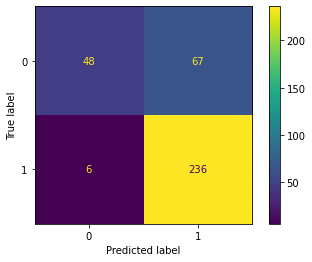

In [231]:
plot_confusion_matrix(logreg,X_train,y_train)

In [232]:
print(classification_report(y_train, pred_y_train))

              precision    recall  f1-score   support

           0       0.89      0.42      0.57       115
           1       0.78      0.98      0.87       242

    accuracy                           0.80       357
   macro avg       0.83      0.70      0.72       357
weighted avg       0.81      0.80      0.77       357



### ROC Curve

In [233]:
# TPR & FPR at 50% threshold
print("TPR-",236/(236 + 6))
print("FPR-",67/(67 + 48))

TPR- 0.9752066115702479
FPR- 0.5826086956521739


In [239]:
print(y_train.shape)
print(pred_y_train_prob.shape)

(357,)
(357, 2)


In [241]:
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, pred_y_train_prob[:, 1])

AUC: 0.779


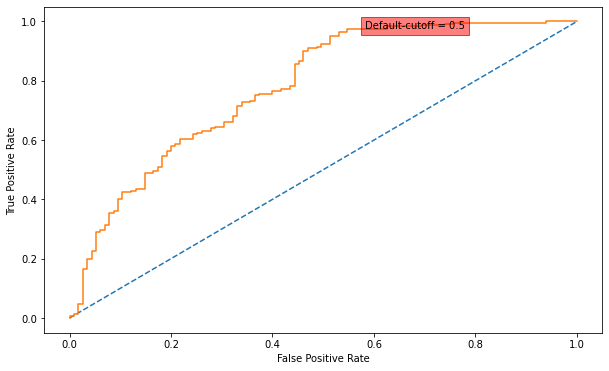

In [251]:
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);
cutoff = 0.5
plt.text(0.5826086956521739,0.9752066115702479, f"Default-cutoff = {cutoff}", bbox={'facecolor': 'red','alpha':0.5})
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# calculate AUC
auc = roc_auc_score(y_train, pred_y_train_prob[:, 1])
print('AUC: %.3f' % auc)

## Test Data

In [198]:
pred_y_test = logreg.predict(X_test)

In [199]:
pred_y_test_prob = logreg.predict_proba(X_test)
pd.DataFrame(pred_y_test_prob).head()

,0,1
0,0.820215,0.179785
1,0.179498,0.820502
2,0.187048,0.812952
3,0.162352,0.837648
4,0.262656,0.737344


In [200]:
# Accuracy - Training Data
logreg.score(X_test, y_test)

0.8376623376623377

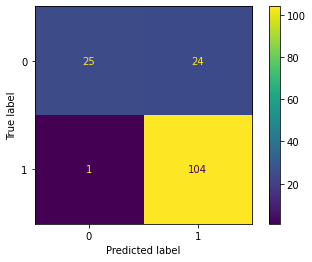

In [201]:
plot_confusion_matrix(logreg,X_test,y_test)

In [202]:
print(classification_report(y_test, pred_y_test))

              precision    recall  f1-score   support

           0       0.96      0.51      0.67        49
           1       0.81      0.99      0.89       105

    accuracy                           0.84       154
   macro avg       0.89      0.75      0.78       154
weighted avg       0.86      0.84      0.82       154



In [244]:
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, pred_y_test_prob[:,1])

In [245]:
# TPR & FPR at 50% threshold
print("TPR-",104/(104 + 1))
print("FPR-",24/(24 + 25))

TPR- 0.9904761904761905
FPR- 0.4897959183673469


AUC: 0.825


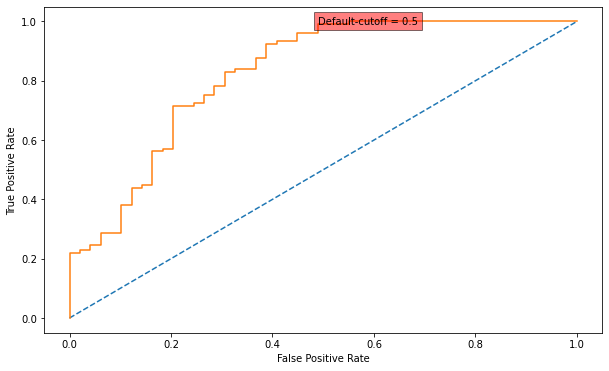

In [252]:
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);
cutoff = 0.5
plt.text(0.4897959183673469,0.9904761904761905, f"Default-cutoff = {cutoff}", bbox={'facecolor': 'red','alpha':0.5})
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# calculate AUC
auc = roc_auc_score(y_test, pred_y_test_prob[:, 1])
print('AUC: %.3f' % auc)

#### Sensitivity = TruePositive / (TruePositive + FalseNegative)
#### Specificity = TrueNegative / (FalsePositive + TrueNegative)


#### Sensitivity = True Positive Rate
#### Specificity = 1 – False Positive Rate

The Geometric Mean or G-Mean is a metric for imbalanced classification that, if optimized, will seek a balance between the sensitivity and the specificity.

**G-Mean = sqrt(Sensitivity * Specificity)**

One approach would be to test the model with each threshold returned from the call roc_auc_score() and select the threshold with the largest G-Mean value.

In [254]:
gmeans = sqrt(tpr * (1-fpr))
gmeans

array([0.        , 0.09759001, 0.46802523, 0.46322485, 0.47318781,
       0.46823283, 0.48735218, 0.48213971, 0.51790112, 0.50651729,
       0.58487579, 0.57819128, 0.62004107, 0.61278887, 0.61941381,
       0.61199541, 0.68568594, 0.6772723 , 0.68298778, 0.67439639,
       0.75399809, 0.73441038, 0.73929023, 0.72923139, 0.74348482,
       0.73308592, 0.74687558, 0.73612861, 0.75823948, 0.74700568,
       0.75128655, 0.72816449, 0.74452978, 0.73242279, 0.75206228,
       0.73942167, 0.74322335, 0.71713717, 0.72803101, 0.70054817,
       0.71087622, 0.666861  , 0.67005939, 0.        ])

**Youden’s J statistic**

Which we can restate as:

* J = TruePositiveRate – FalsePositiveRate

Best Threshold=0.701081, G-Mean=0.758


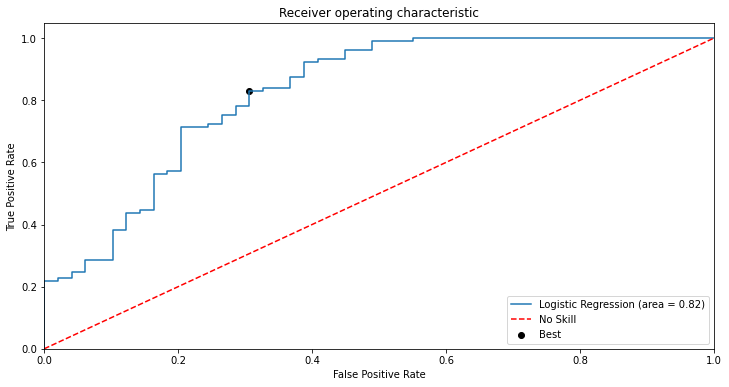

In [249]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
# roc curve for logistic regression model with optimal threshold
from numpy import sqrt
from numpy import argmax

logit_roc_auc = roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))

# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
plt.figure(figsize = (12,6))

plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--',label='No Skill')

plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Precission recall curve

Best Threshold=0.550745, F-Score=0.893


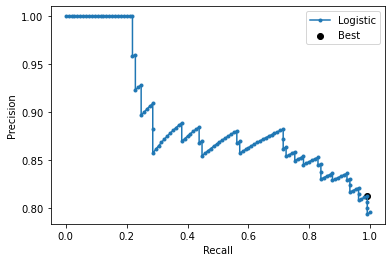

In [250]:
from sklearn.metrics import precision_recall_curve
yhat=logreg.predict_proba(X_test)[:,1]

# calculate roc curves
precision, recall, thresholds = precision_recall_curve(y_test, yhat)
# convert to f score
fscore = (2 * precision * recall) / (precision + recall)

# locate the index of the largest f score
ix = argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
# plot the roc curve for the model
# no_skill = len(y_test[y_test==1]) / len(y_test)
# plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
plt.plot(recall, precision, marker='.', label='Logistic')
plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
# show the plot
plt.show()